
# Project: Investigate a Dataset - TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The TMDB movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The  dataset is available on Kaggle [here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).
The dataset contains 21 columns and 10,866 row. The columns are:
1. <b>id</b>: rows unique ids
2. <b>imdb_id</b>: IMDB unique ids
3. <b>popularity</b>: popularity score
4. <b>budget</b>: the budget of the movie
5. <b>revenue</b>: the revenue of the movie
6. <b>original_title</b>: the title of the movie
7. <b>cast</b>: the cast of the movie
8. <b>homepage</b>: link to the homepage website of the movie
9. <b>director</b>: the name of the director of the movie
10. <b>tagline</b>: the tagline of the movie
11. <b>keywords</b>: keywords related to the movie
12. <b>overview</b>: an overview description of the movie
13. <b>runtime</b>: the runtime in minutes
14. <b>genres</b>: the genres of the movie
15. <b>production_companies</b>: the name of movie's production companies
16. <b>release_date</b>: the release date of the movie
17. <b>vote_count</b>: number of votes
18. <b>vote_average</b>: the voting average 
19. <b>release_year</b>: the release year of the movie
20. <b>budget_adj</b>: budget in 2010 dollars, accounting for inflation
21. <b>revenue_adj</b>: revenue in 2010 dollars, accounting for inflation

### Questions for Analysis
>For this project, the following questions will be explored and used for insights derivation:
1. Which year had the highest revenue and which year had the lowest revenue?
2. Which movie genre is popular?
3. Is there a relation between revenue and budget?


In [12]:
 # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


I will begin by loading the dataset for exploration and pre-processing

In [13]:
#Loading data and storing it in variable (movies)
movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
#View the number of rows and columns in the dataset
movies.shape

(10866, 21)

We can see that the dataset contains 10,866 row and 21 columns

In [14]:
#View dataset information and the columns types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> In this section of the report, I will clean and pre-process the data by removing unnecessary columns, dropping duplicated rows, and dropping null values.
 

In [16]:
#Remove unnecessary columns
columns_to_drop = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj']

movies.drop(columns= columns_to_drop, axis = 1, inplace = True)

movies.head(1)

,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


In [17]:
movies.shape

(10866, 10)

We can see that we dropped 11 columns that were unrelevant to our insights and were left with 10 columns. Now, we will check the number of duplicated rows and null values.

In [24]:
duplicated_rows = movies.duplicated().sum()
null_values = movies.isnull().sum()

print('Number of duplicated rows is ', duplicated_rows)
print('Null values are: \n', null_values)

Number of duplicated rows is  0
Null values are: 
 popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64


We can see that the data contains one duplicated row only, but contains null values for some attributes. Thus, we will drop duplicated rows and null values.

In [25]:
#Drop duplicates
movies.drop_duplicates(inplace= True)

#Drop null values
movies.dropna(inplace= True)

In [26]:
movies.shape

(10731, 10)

Now, the number of rows left is 10,731

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data is trimmed and cleaned, we are ready to move on to exploration. We will derive insights using the  mentioned questions in the introduction. We will support the insights with visualization and explanation.


### Which year had the highest revenue and which year had the lowest revenue?

In [27]:
#Group by release year and sum the revenue
revenue_by_year = movies.groupby('release_year')['revenue'].sum()

#Find the year with the highest revenue
year_highest_revenue = revenue_by_year.idxmax()

#Find the year with the lowest revenue
year_lowest_revenue = revenue_by_year.idxmin()

In [28]:
print('The year with the highest revenue', year_highest_revenue)
print('The year with the lowest revenue', year_lowest_revenue)

The year with the highest revenue 2015
The year with the lowest revenue 1966


Now, we will plot the figure using a line chart

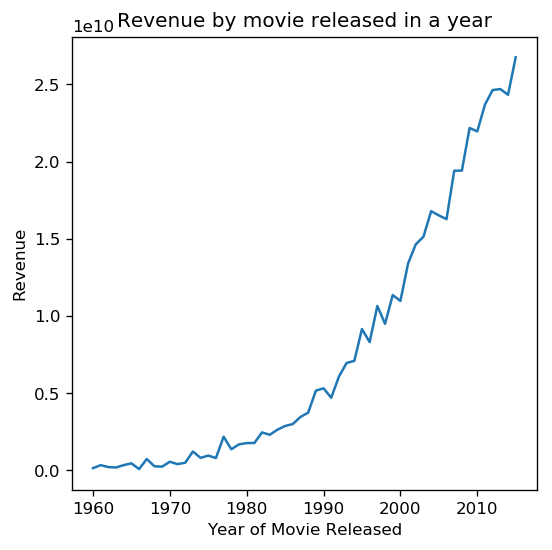

In [29]:
plt.figure(figsize= (5, 5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', color = 'black')
# y-axis
plt.ylabel('Revenue', color = 'black')
# Title
plt.title('Revenue by movie released in a year', color = 'black')

# Plot Line chart
plt.plot(revenue_by_year)

# Display plot
plt.show()

We can see that the rise of revenue in the movies industry began in the year 1990, and it continues to rise until now. The year with the highest revenue is 2015 and the year with the lowest revenue is 1966.

### Which movie genre is popular?

In [30]:
movies.head()

,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015


As we can see, the **genres** attribute contains the genres seperated by **|**, so we need to seperate the genres and count their values to measure popularity

In [34]:
#Function to seperate the genres and count their values which returns a series of seperated genres and a series of their counted values
def seperate_and_count_genres(column):
    seperate = movies[column].str.cat(sep = '|')
    seperate = pd.Series(seperate.split('|'))
    genres = seperate.value_counts(ascending = False)
    return seperate, genres

In [32]:
#Store seperated genres
seperated_genres = seperate_and_count_genres('genres')[0]
seperated_genres

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
5              Adventure
6        Science Fiction
7               Thriller
8              Adventure
9        Science Fiction
10              Thriller
11                Action
12             Adventure
13       Science Fiction
14               Fantasy
15                Action
16                 Crime
17              Thriller
18               Western
19                 Drama
20             Adventure
21              Thriller
22       Science Fiction
23                Action
24              Thriller
25             Adventure
26                 Drama
27             Adventure
28       Science Fiction
29                Family
              ...       
26723              Drama
26724            Romance
26725           Thriller
26726              Drama
26727              Crime
26728             Comedy
26729             Family
26730            Mystery
26731            Romance


In [33]:
#Store counted genres
genres = seperate_and_count_genres('genres')[1]
genres

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

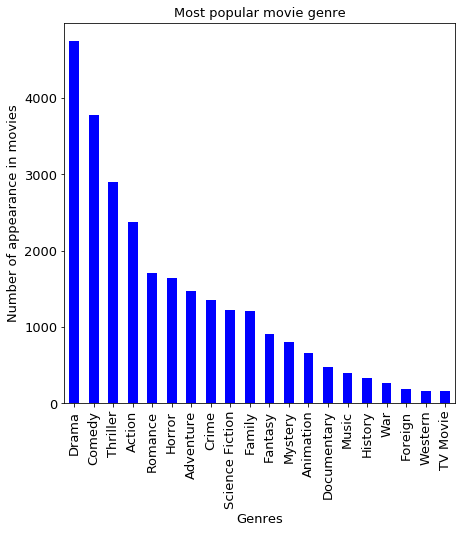

In [35]:
#plot
bar = genres.plot.bar(color = 'blue', fontsize = 13)

bar.figure.set_size_inches(7, 7);

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

From the bar chart, we can see that the most popular movie genre is **Drama** followed by **Comedy** then **Thriller**. The least popular movies are **Western** and **Foreign**.

### Is there a relation between revenue and budget?

In [36]:
#Measure the correlation between budget and revenue
movies['budget'].corr(movies['revenue'])

0.73448736240523549

The relation results in a slight positive correlation

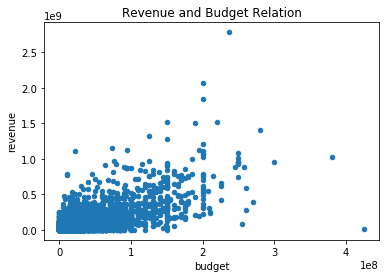

In [37]:
movies.plot(x= 'budget', y= 'revenue', kind= 'scatter', title= 'Revenue and Budget Relation')

The scatter plot shows a weak positive correlation between **budget** and **revenue**

<a id='conclusions'></a>
## Conclusions

In this report, we analyzed TMDB movie data and explored three questions regarding the data. For the first question, we explored the revenue of movies by finding which year contained the most revenues and which year contained the minimum. We concluded that year 2015 had the most revenue and 1966 had the lowest.

For the second question, we explored the movie genres and their popularity. This part included more work on the data cleaning part since the movie genres were not seperated and they were grouped in one column. Thus, we seperated the genres and their counted values. Then, we plotted the a bar graph where it showed that the most popular movie genre is **Drama** followed by **Comedy**, and the least popular movie genres are **Foreign** and **Western**.

For the last question, we wanted to see if there was a relation between the budget of the movie and the revenue. Based on the correlation, we concluded that there is a positive weak relation.

The limitation of this work is the old data, since we are in 2022 and the movie industry has grown ever since. The dataset should be updated to draw more conclusions and tackle new insights.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])